In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import sys
import pathlib
import pickle

sys.path.append('..')

In [4]:
import seaborn as sns
import matplotlib.style as style
import pandas as pd
from sklearn.metrics import auc

In [5]:
from pals.evaluation import evaluate_performance, compute_pr_curve, get_method_true_answers, get_auc_for_hat_data
from pals.common import *

2020-03-06 14:17:13.396 | WARNING  | pals.reactome:get_neo4j_driver:14 - Using a default neo4j server: bolt://localhost:7687
2020-03-06 14:17:13.396 | WARNING  | pals.reactome:get_neo4j_driver:19 - Using a default neo4j username or password: neo4j
2020-03-06 14:17:14.469 | INFO     | pals.reactome:get_neo4j_driver:24 - Created graph database driver for bolt://localhost:7687 (neo4j)


In [6]:
style.use('seaborn-poster') # sets the size of the charts
sns.set_context('poster') # everything is larger

# HAT Data Evaluation

This notebook is used to compute precision, recall and F-1 scores on the HAT data for the manuscript.

In [7]:
base_dir = os.path.join('test_data', 'HAT')

In [8]:
results = load_obj(os.path.join(base_dir, 'HAT_results.p'))

In [9]:
# set_log_level_info()

In [10]:
N = None

### Plasma

In [20]:
experiment_name = 'plasma'
res = results[experiment_name]
method_true_answers = get_method_true_answers(res, N=N)

2020-03-06 14:19:49.536 | DEBUG    | pals.feature_extraction:change_zero_peak_ints:295 - Setting the zero intensity values in the dataframe
2020-03-06 14:19:49.635 | DEBUG    | pals.feature_extraction:standardize_intensity_df:276 - Scaling the data across the sample: zero mean and unit variance
2020-03-06 14:19:49.711 | DEBUG    | pals.PALS:get_plage_activity_df:79 - Mean values of the rows in the DF is [ 0. -0.  0. ... -0. -0. -0.]
2020-03-06 14:19:49.712 | DEBUG    | pals.PALS:get_plage_activity_df:80 - Variance in the rows of the DF is [1. 1. 1. ... 1. 1. 1.]
2020-03-06 14:19:51.812 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:91 - Calculating plage p-values with resampling
2020-03-06 14:19:51.813 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:98 - Comparison Stage1/Control
2020-03-06 14:19:51.814 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:106 - Resampling 0/1000
2020-03-06 14:19:51.920 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:106 - Resampling 100/1000
2020-0

In [21]:
results['plasma']['data_source'].get_measurements().shape, results['plasma']['case'], \
len(results['plasma']['data_source'].groups[results['plasma']['case']]), \
results['plasma']['control'], \
len(results['plasma']['data_source'].groups[results['plasma']['control']]), \

((15584, 60), 'Stage1', 20, 'Control', 20)

In [22]:
method_true_answers

{'PALS':                                                     pw_name       p_value  \
 map04961  Endocrine and other factor-regulated calcium r...  0.000000e+00   
 map07226  Progesterone, androgen and estrogen receptor a...  0.000000e+00   
 map00903                    Limonene and pinene degradation  6.587322e-13   
 map00902                         Monoterpenoid biosynthesis  4.695069e-09   
 map00626                            Naphthalene degradation  4.227293e-08   
 map00622                                 Xylene degradation  5.777393e-08   
 map00930                            Caprolactam degradation  1.264554e-07   
 map00981                        Insect hormone biosynthesis  1.699415e-07   
 map00623                                Toluene degradation  3.146892e-07   
 map04913                            Ovarian steroidogenesis  4.117238e-07   
 map05215                                    Prostate cancer  5.074261e-07   
 map00982                  Drug metabolism - cytochrome 

In [23]:
plasma_f1_df = evaluate_performance(res, method_true_answers, N)

2020-03-06 14:21:42.787 | DEBUG    | pals.evaluation:evaluate_performance:425 - Evaluating partial results
2020-03-06 14:21:55.145 | DEBUG    | pals.evaluation:evaluate_performance:462 - Done!


In [24]:
plasma_f1_df[plasma_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.864762,0.072028,0.619048,0.818182,0.869565,0.913043,1.0
0.4,500.0,0.772988,0.089845,0.500000,0.718571,0.772727,0.833333,1.0
0.6,500.0,0.694741,0.113175,0.344828,0.615385,0.695652,0.769231,1.0
0.8,500.0,0.613767,0.147429,0.277778,0.500000,0.600000,0.714286,1.0


In [25]:
plasma_f1_df[plasma_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.837171,0.133246,0.5,0.727273,0.818182,1.0,1.0
0.4,500.0,0.772996,0.173105,0.0,0.666667,0.750000,1.0,1.0
0.6,500.0,0.774288,0.269571,0.0,0.666667,0.800000,1.0,1.0
0.8,500.0,0.529077,0.456201,0.0,0.000000,0.625000,1.0,1.0


In [26]:
plasma_f1_df[plasma_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.712404,0.412130,0.0,0.5,1.000000,1.000000,1.0
0.4,500.0,0.549352,0.433179,0.0,0.0,0.688259,1.000000,1.0
0.6,500.0,0.433194,0.430652,0.0,0.0,0.400000,1.000000,1.0
0.8,500.0,0.200394,0.334768,0.0,0.0,0.000000,0.372727,1.0


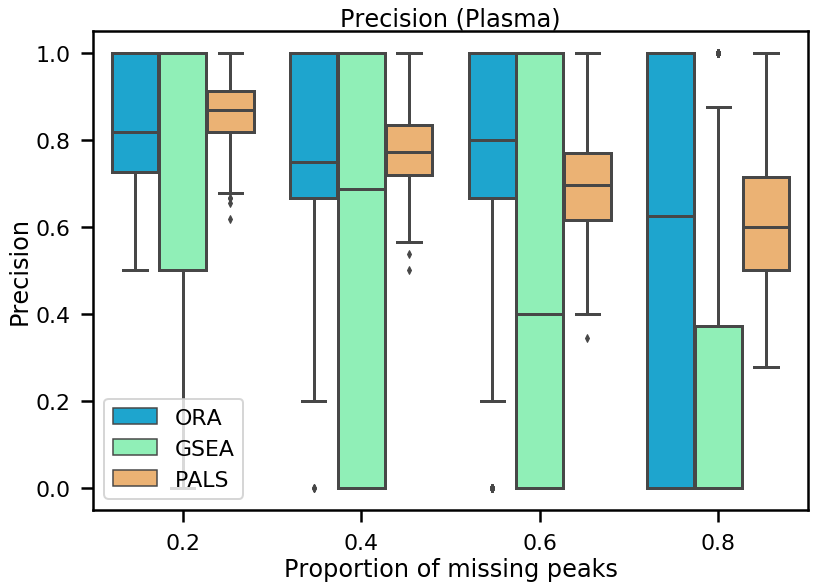

In [27]:
ax = sns.boxplot(x='missing_peaks', y='precision', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=plasma_f1_df, palette=("rainbow"))
ax.set(ylabel='Precision', xlabel='Proportion of missing peaks')
plt.legend(loc='lower left')
plt.title('Precision (Plasma)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_precision_plasma.eps'), dpi=300)

In [28]:
plasma_f1_df[plasma_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.882364,0.090478,0.590909,0.818182,0.909091,0.954545,1.000000
0.4,500.0,0.758636,0.117580,0.454545,0.681818,0.772727,0.863636,1.000000
0.6,500.0,0.608091,0.131330,0.272727,0.500000,0.590909,0.681818,0.954545
0.8,500.0,0.417455,0.121462,0.090909,0.318182,0.409091,0.500000,0.772727


In [29]:
plasma_f1_df[plasma_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.714444,0.212580,0.111111,0.555556,0.777778,0.888889,1.000000
0.4,500.0,0.527333,0.206810,0.000000,0.444444,0.555556,0.666667,1.000000
0.6,500.0,0.322000,0.195182,0.000000,0.222222,0.333333,0.444444,0.888889
0.8,500.0,0.137333,0.157775,0.000000,0.000000,0.111111,0.222222,0.777778


In [30]:
plasma_f1_df[plasma_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.216000,0.226464,0.0,0.055556,0.111111,0.333333,0.944444
0.4,500.0,0.182556,0.220968,0.0,0.000000,0.111111,0.291667,0.944444
0.6,500.0,0.117000,0.176234,0.0,0.000000,0.055556,0.166667,0.888889
0.8,500.0,0.056333,0.119607,0.0,0.000000,0.000000,0.055556,0.777778


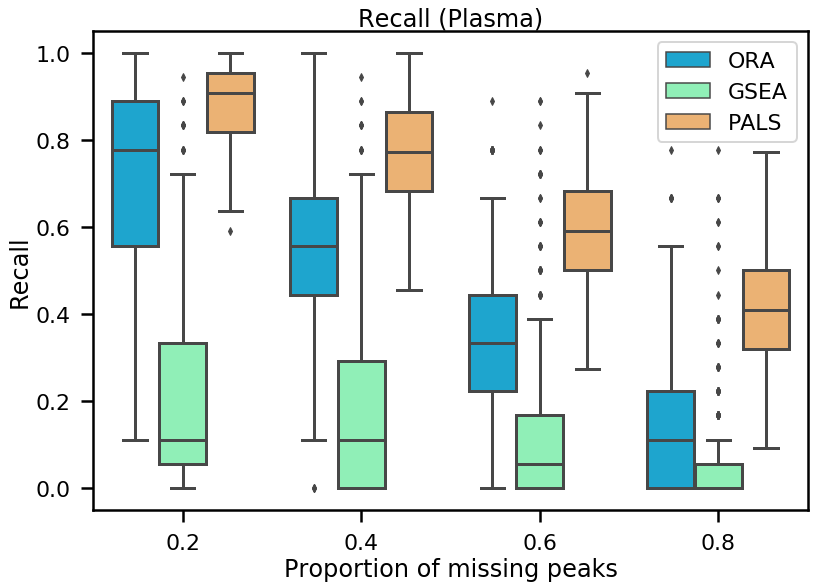

In [31]:
ax = sns.boxplot(x='missing_peaks', y='recall', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=plasma_f1_df, palette=("rainbow"))
ax.set(ylabel='Recall', xlabel='Proportion of missing peaks')
plt.legend(loc='upper right')
plt.title('Recall (Plasma)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_recall_plasma.eps'), dpi=300)

In [32]:
plasma_f1_df[plasma_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.869458,0.058958,0.604651,0.837209,0.876524,0.910079,1.000000
0.4,500.0,0.758522,0.076545,0.550000,0.710417,0.765957,0.809524,0.976744
0.6,500.0,0.637267,0.091731,0.324324,0.577778,0.648649,0.700000,0.869565
0.8,500.0,0.482554,0.102150,0.153846,0.411765,0.479130,0.562500,0.744186


In [33]:
plasma_f1_df[plasma_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.737288,0.127455,0.2,0.666667,0.761905,0.818182,1.000000
0.4,500.0,0.594267,0.165649,0.0,0.500000,0.615385,0.705882,0.941176
0.6,500.0,0.426470,0.206521,0.0,0.285714,0.461538,0.571429,0.875000
0.8,500.0,0.202013,0.205099,0.0,0.000000,0.200000,0.363636,0.800000


In [34]:
plasma_f1_df[plasma_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.295149,0.257486,0.0,0.105263,0.200000,0.480000,0.909091
0.4,500.0,0.243077,0.253778,0.0,0.000000,0.190476,0.434783,0.941176
0.6,500.0,0.158728,0.201216,0.0,0.000000,0.102632,0.272727,0.842105
0.8,500.0,0.075293,0.142301,0.0,0.000000,0.000000,0.105263,0.823529


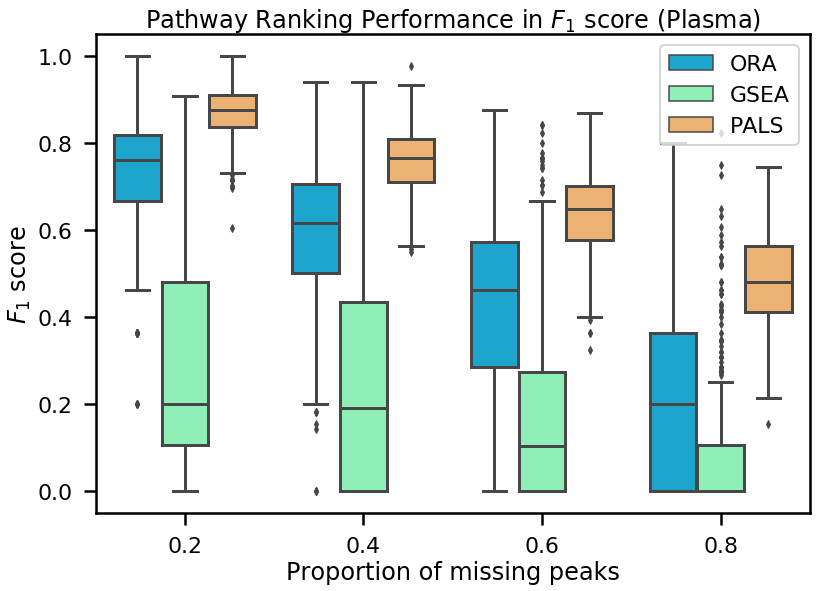

In [35]:
ax = sns.boxplot(x='missing_peaks', y='F1', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=plasma_f1_df, palette=("rainbow"))
ax.set(ylabel='$F_{1}$ score', xlabel='Proportion of missing peaks')
plt.legend(loc='upper right')
plt.title('Pathway Ranking Performance in $F_{1}$ score (Plasma)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_f1_plasma.eps'), dpi=300)

In [36]:
# plasma_auc_df = get_auc_for_hat_data(res, method_true_answers)

In [37]:
# sns.boxplot(x='proportion', y='auc', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=plasma_auc_df, palette=("rainbow"))
# plt.legend(loc='upper left')
# plt.title('AUC Performance (Plasma)')
# plt.savefig(os.path.join('test_data', 'HAT', 'auc_plasma.eps'), dpi=300)

### CSF

In [38]:
experiment_name = 'csf'
res = results[experiment_name]
method_true_answers = get_method_true_answers(res, N=N)

2020-03-06 14:22:18.915 | DEBUG    | pals.feature_extraction:change_zero_peak_ints:295 - Setting the zero intensity values in the dataframe
2020-03-06 14:22:18.974 | DEBUG    | pals.feature_extraction:standardize_intensity_df:276 - Scaling the data across the sample: zero mean and unit variance
2020-03-06 14:22:19.004 | DEBUG    | pals.PALS:get_plage_activity_df:79 - Mean values of the rows in the DF is [ 0.  0.  0. ... -0. -0. -0.]
2020-03-06 14:22:19.005 | DEBUG    | pals.PALS:get_plage_activity_df:80 - Variance in the rows of the DF is [1. 1. 1. ... 1. 1. 1.]
2020-03-06 14:22:20.913 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:91 - Calculating plage p-values with resampling
2020-03-06 14:22:20.914 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:98 - Comparison Stage_2/Control
2020-03-06 14:22:20.915 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:106 - Resampling 0/1000
2020-03-06 14:22:21.020 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:106 - Resampling 100/1000
2020-

In [39]:
results['csf']['data_source'].get_measurements().shape, results['csf']['case'], \
len(results['csf']['data_source'].groups[results['csf']['case']]), \
results['csf']['control'], \
len(results['csf']['data_source'].groups[results['csf']['control']]), \

((8154, 57), 'Stage_2', 20, 'Control', 17)

In [40]:
method_true_answers

{'PALS':                                            pw_name       p_value  \
 map05014       Amyotrophic lateral sclerosis (ALS)  2.417057e-09   
 map00982         Drug metabolism - cytochrome P450  3.831029e-09   
 map00592           alpha-Linolenic acid metabolism  1.414745e-08   
 map02030                      Bacterial chemotaxis  1.472320e-08   
 map00640                     Propanoate metabolism  3.597543e-08   
 ...                                            ...           ...   
 map00360                  Phenylalanine metabolism  3.544352e-02   
 map00053         Ascorbate and aldarate metabolism  3.688025e-02   
 ingenza00004                         BMA Synthesis  4.096571e-02   
 map00780                         Biotin metabolism  4.128194e-02   
 map00860      Porphyrin and chlorophyll metabolism  4.571918e-02   
 
                         sf  unq_pw_F  tot_ds_F  F_coverage  
 map05014      2.790679e-01        10         2       20.00  
 map00982      2.606794e-02        63 

In [41]:
csf_f1_df = evaluate_performance(res, method_true_answers, N=N)

2020-03-06 14:22:37.633 | DEBUG    | pals.evaluation:evaluate_performance:425 - Evaluating partial results
2020-03-06 14:22:50.419 | DEBUG    | pals.evaluation:evaluate_performance:462 - Done!


In [42]:
csf_f1_df[csf_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.943911,0.024029,0.857143,0.928571,0.942529,0.960526,1.000000
0.4,500.0,0.906702,0.032314,0.806452,0.887500,0.909091,0.929577,0.986301
0.6,500.0,0.868817,0.050252,0.695652,0.836998,0.870250,0.903381,1.000000
0.8,500.0,0.810890,0.081739,0.536585,0.755962,0.822005,0.870520,1.000000


In [43]:
csf_f1_df[csf_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.950914,0.044719,0.829787,0.912560,0.951800,1.000000,1.0
0.4,500.0,0.921101,0.046941,0.708333,0.891892,0.923077,0.954545,1.0
0.6,500.0,0.898792,0.068183,0.702128,0.852941,0.903226,0.954545,1.0
0.8,500.0,0.872677,0.139222,0.000000,0.828325,0.882353,0.952381,1.0


In [44]:
csf_f1_df[csf_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.520306,0.311675,0.0,0.353032,0.550000,0.727273,1.0
0.4,500.0,0.515531,0.332336,0.0,0.319167,0.530556,0.750000,1.0
0.6,500.0,0.411516,0.319909,0.0,0.000000,0.414214,0.630556,1.0
0.8,500.0,0.269878,0.303274,0.0,0.000000,0.210526,0.462821,1.0


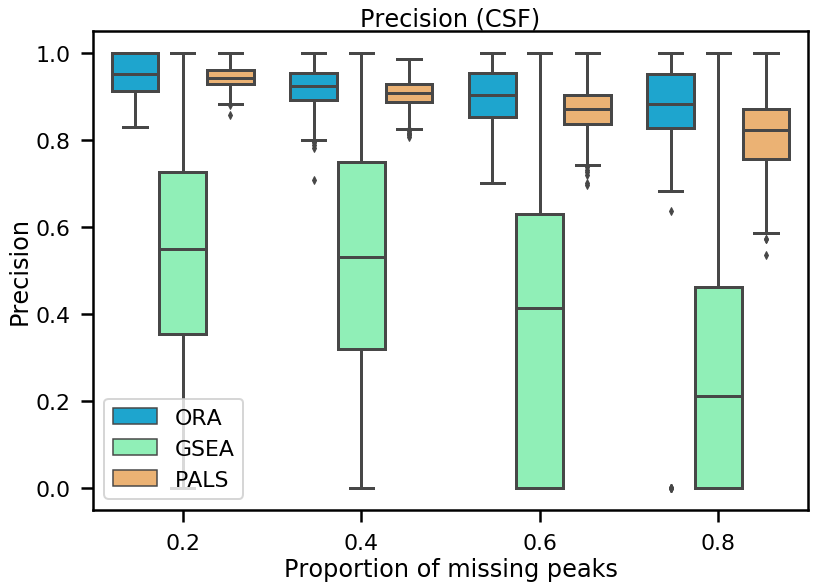

In [45]:
ax = sns.boxplot(x='missing_peaks', y='precision', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=csf_f1_df, palette=("rainbow"))
ax.set(ylabel='Precision', xlabel='Proportion of missing peaks')
plt.legend(loc='lower left')
plt.title('Precision (CSF)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_precision_csf.eps'), dpi=300)

In [46]:
csf_f1_df[csf_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.910071,0.052756,0.607143,0.880952,0.916667,0.952381,1.000000
0.4,500.0,0.826976,0.079581,0.452381,0.785714,0.833333,0.880952,0.964286
0.6,500.0,0.686786,0.131234,0.285714,0.604167,0.714286,0.785714,0.916667
0.8,500.0,0.491071,0.148488,0.154762,0.380952,0.511905,0.607143,0.833333


In [47]:
csf_f1_df[csf_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.872930,0.058674,0.651163,0.837209,0.883721,0.906977,1.000000
0.4,500.0,0.748000,0.085802,0.441860,0.697674,0.767442,0.813953,0.930233
0.6,500.0,0.603302,0.133092,0.209302,0.511628,0.627907,0.697674,0.906977
0.8,500.0,0.378047,0.171961,0.000000,0.255814,0.395349,0.511628,0.744186


In [48]:
csf_f1_df[csf_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.456500,0.345462,0.0,0.071429,0.535714,0.758929,1.000000
0.4,500.0,0.372357,0.331325,0.0,0.035714,0.285714,0.678571,1.000000
0.6,500.0,0.317143,0.300355,0.0,0.000000,0.214286,0.607143,0.964286
0.8,500.0,0.166857,0.220333,0.0,0.000000,0.035714,0.285714,0.892857


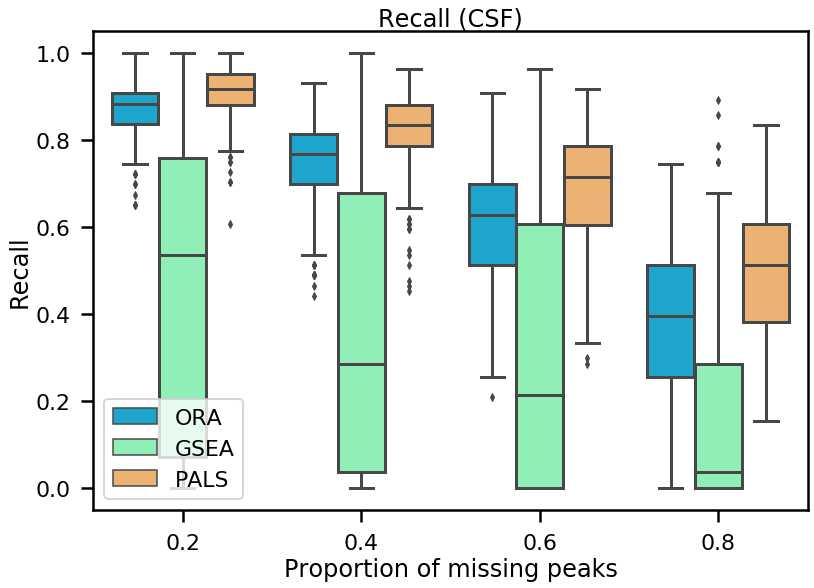

In [49]:
ax = sns.boxplot(x='missing_peaks', y='recall', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=csf_f1_df, palette=("rainbow"))
ax.set(ylabel='Recall', xlabel='Proportion of missing peaks')
plt.legend(loc='lower left')
plt.title('Recall (CSF)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_recall_csf.eps'), dpi=300)

In [50]:
csf_f1_df[csf_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.925617,0.029048,0.755556,0.912223,0.928571,0.946108,0.988235
0.4,500.0,0.862530,0.048255,0.598425,0.840764,0.869565,0.894118,0.964286
0.6,500.0,0.759325,0.092286,0.424779,0.707279,0.784810,0.825202,0.907975
0.8,500.0,0.599046,0.129809,0.250000,0.499060,0.629253,0.707506,0.830189


In [51]:
csf_f1_df[csf_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.908303,0.034198,0.788732,0.886364,0.908034,0.931818,0.988235
0.4,500.0,0.821336,0.052134,0.593750,0.794872,0.829268,0.857143,0.919540
0.6,500.0,0.708662,0.093554,0.346154,0.656716,0.729730,0.773333,0.867470
0.8,500.0,0.500274,0.178388,0.000000,0.392857,0.545455,0.637681,0.810127


In [52]:
csf_f1_df[csf_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.411031,0.264764,0.0,0.133333,0.512224,0.640000,0.838710
0.4,500.0,0.341636,0.254815,0.0,0.068966,0.400000,0.571429,0.825397
0.6,500.0,0.289943,0.236045,0.0,0.000000,0.308776,0.484517,0.807692
0.8,500.0,0.163308,0.186245,0.0,0.000000,0.068966,0.313591,0.703704


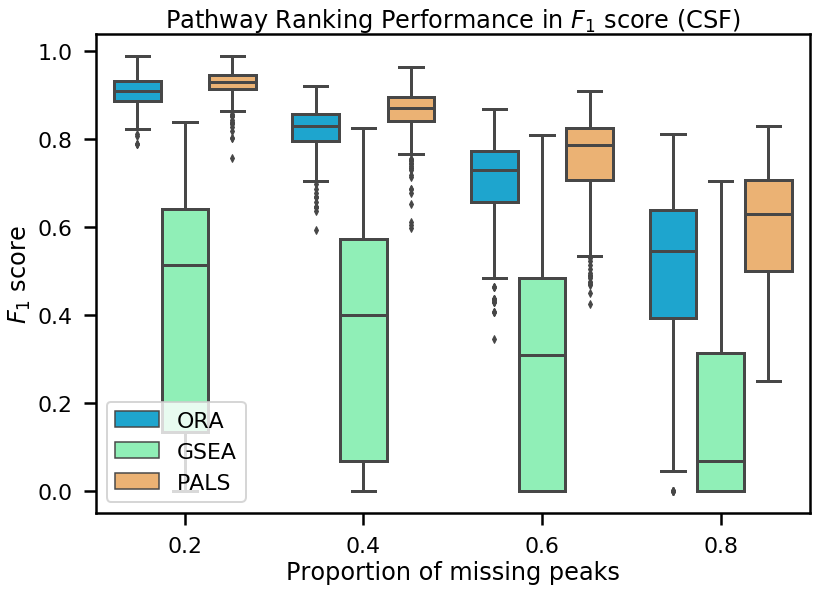

In [53]:
ax = sns.boxplot(x='missing_peaks', y='F1', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=csf_f1_df, palette=("rainbow"))
ax.set(ylabel='$F_{1}$ score', xlabel='Proportion of missing peaks')
plt.legend(loc='lower left')
plt.title('Pathway Ranking Performance in $F_{1}$ score (CSF)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_f1_csf.eps'), dpi=300)

In [54]:
# csf_auc_df = get_auc_for_hat_data(res, method_true_answers)

In [55]:
# sns.boxplot(x='proportion', y='auc', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=csf_auc_df)
# plt.legend(loc='upper left')
# plt.title('AUC Performance (Plasma)')
# plt.savefig(os.path.join('test_data', 'HAT', 'auc_csf.eps'), dpi=300)

### Combined Plot

In [56]:
plasma_f1_df['data'] = 'Plasma'
csf_f1_df['data'] = 'CSF'

In [57]:
df = pd.concat([plasma_f1_df, csf_f1_df])
df.shape

(12000, 10)

In [58]:
df

,method,missing_peaks,i,TP,FP,FN,precision,recall,F1,data
0,PALS,0.2,0,20,6,2,0.769231,0.909091,0.833333,Plasma
1,ORA,0.2,0,5,0,4,1.000000,0.555556,0.714286,Plasma
2,GSEA,0.2,0,6,0,12,1.000000,0.333333,0.500000,Plasma
3,PALS,0.2,1,15,5,7,0.750000,0.681818,0.714286,Plasma
4,ORA,0.2,1,5,1,4,0.833333,0.555556,0.666667,Plasma
...,...,...,...,...,...,...,...,...,...,...
5995,ORA,0.8,498,2,0,41,1.000000,0.046512,0.088889,CSF
5996,GSEA,0.8,498,1,1,27,0.500000,0.035714,0.066667,CSF
5997,PALS,0.8,499,44,8,40,0.846154,0.523810,0.647059,CSF
5998,ORA,0.8,499,19,4,24,0.826087,0.441860,0.575758,CSF


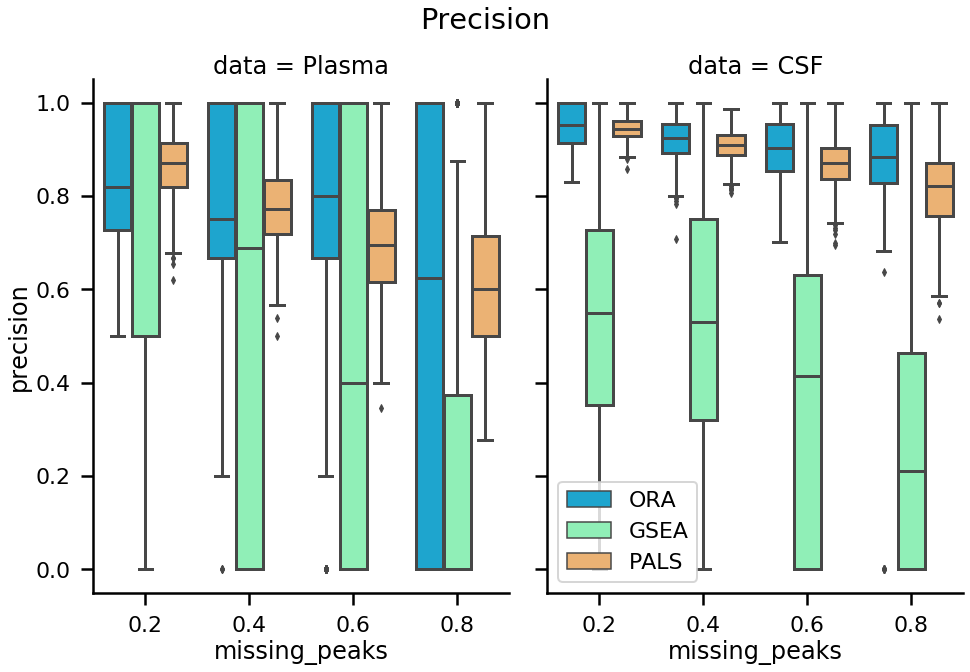

In [59]:
g = sns.catplot(x="missing_peaks", y="precision", hue="method", hue_order=['ORA', 'GSEA', 'PALS'], col="data", data=df, kind="box", height=10, aspect=0.7, 
                palette=("rainbow"), legend=False)
plt.suptitle('Precision')
plt.legend(loc='lower left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_precision.eps'), dpi=300)

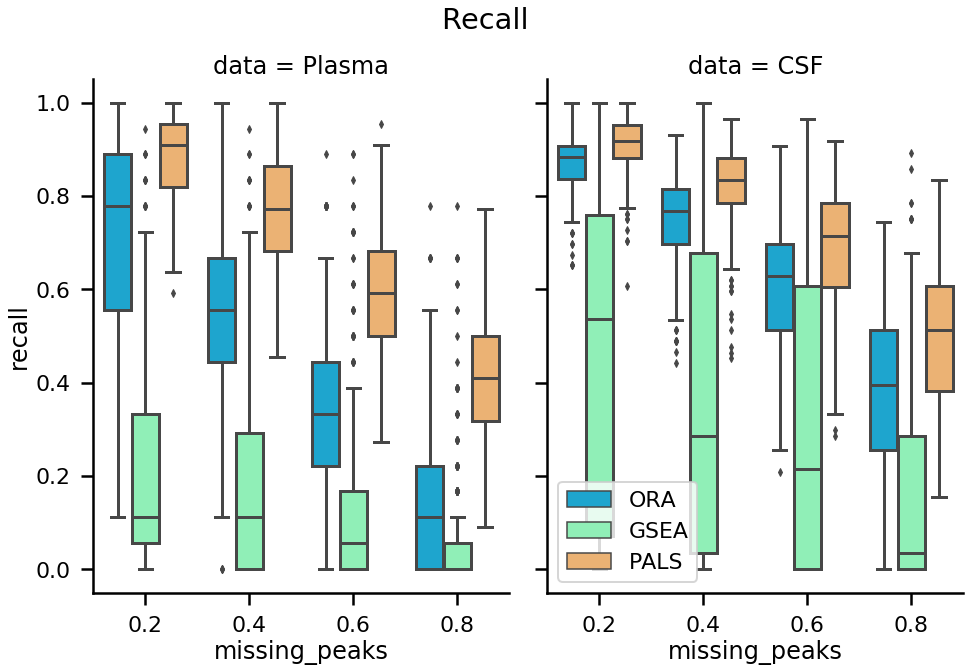

In [60]:
g = sns.catplot(x="missing_peaks", y="recall", hue="method", hue_order=['ORA', 'GSEA', 'PALS'], col="data", data=df, kind="box", height=10, aspect=0.7, 
                palette=("rainbow"), legend=False)
plt.suptitle('Recall')
plt.legend(loc='lower left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_recall.eps'), dpi=300)

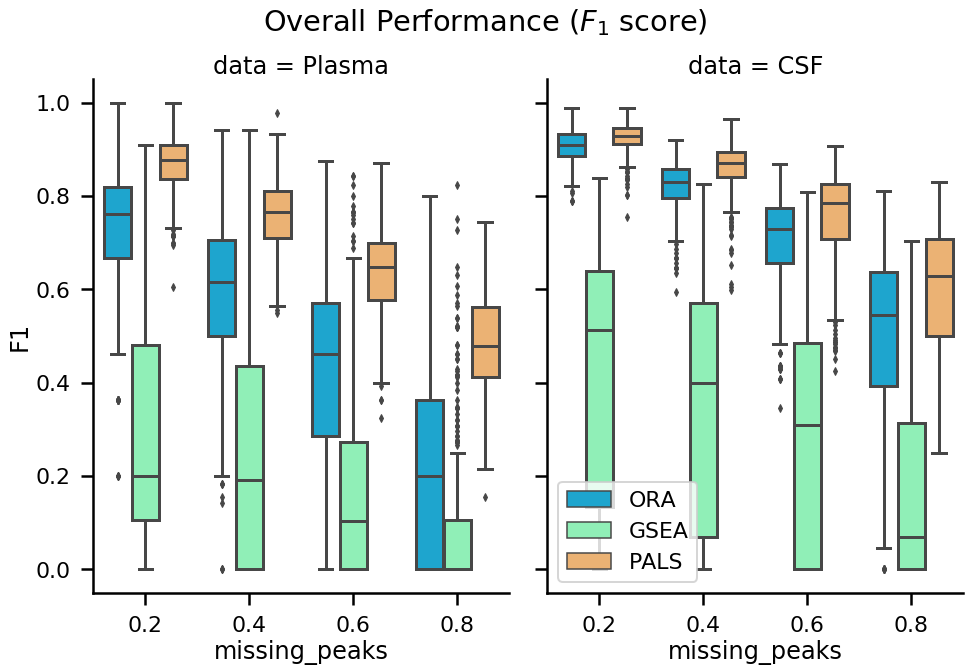

In [61]:
g = sns.catplot(x="missing_peaks", y="F1", hue="method", hue_order=['ORA', 'GSEA', 'PALS'], col="data", data=df, kind="box", height=10, aspect=0.7, 
                palette=("rainbow"), legend=False)
plt.suptitle('Overall Performance ($F_{1}$ score)')
plt.legend(loc='lower left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_f1.eps'), dpi=300)

#### True Positives

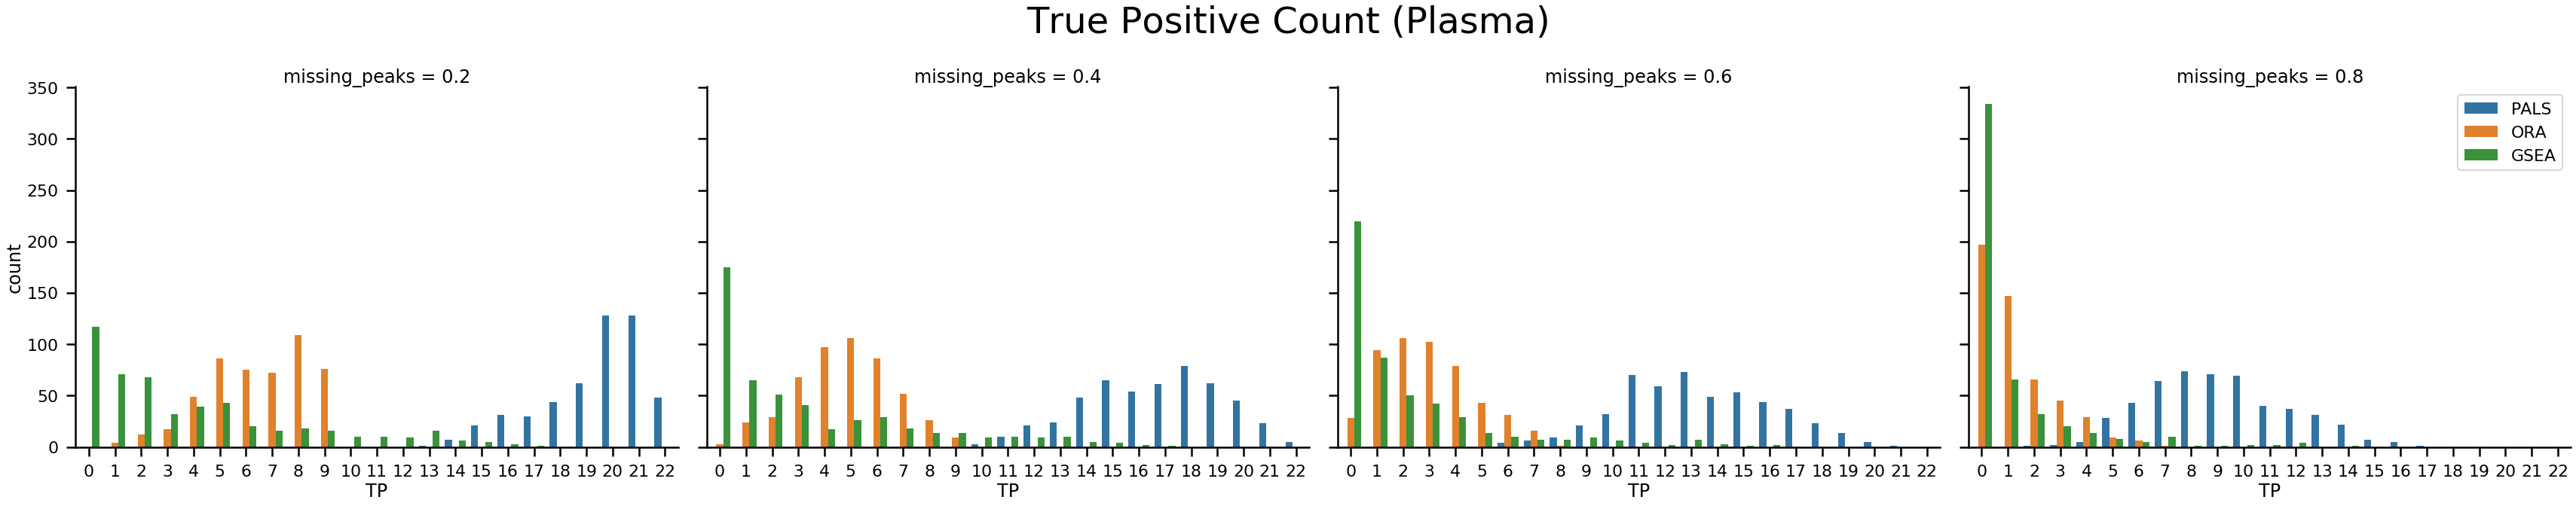

In [62]:
g = sns.catplot(x="TP", col='missing_peaks', hue="method", data=plasma_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('True Positive Count (Plasma)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma_TP.eps'), dpi=300)

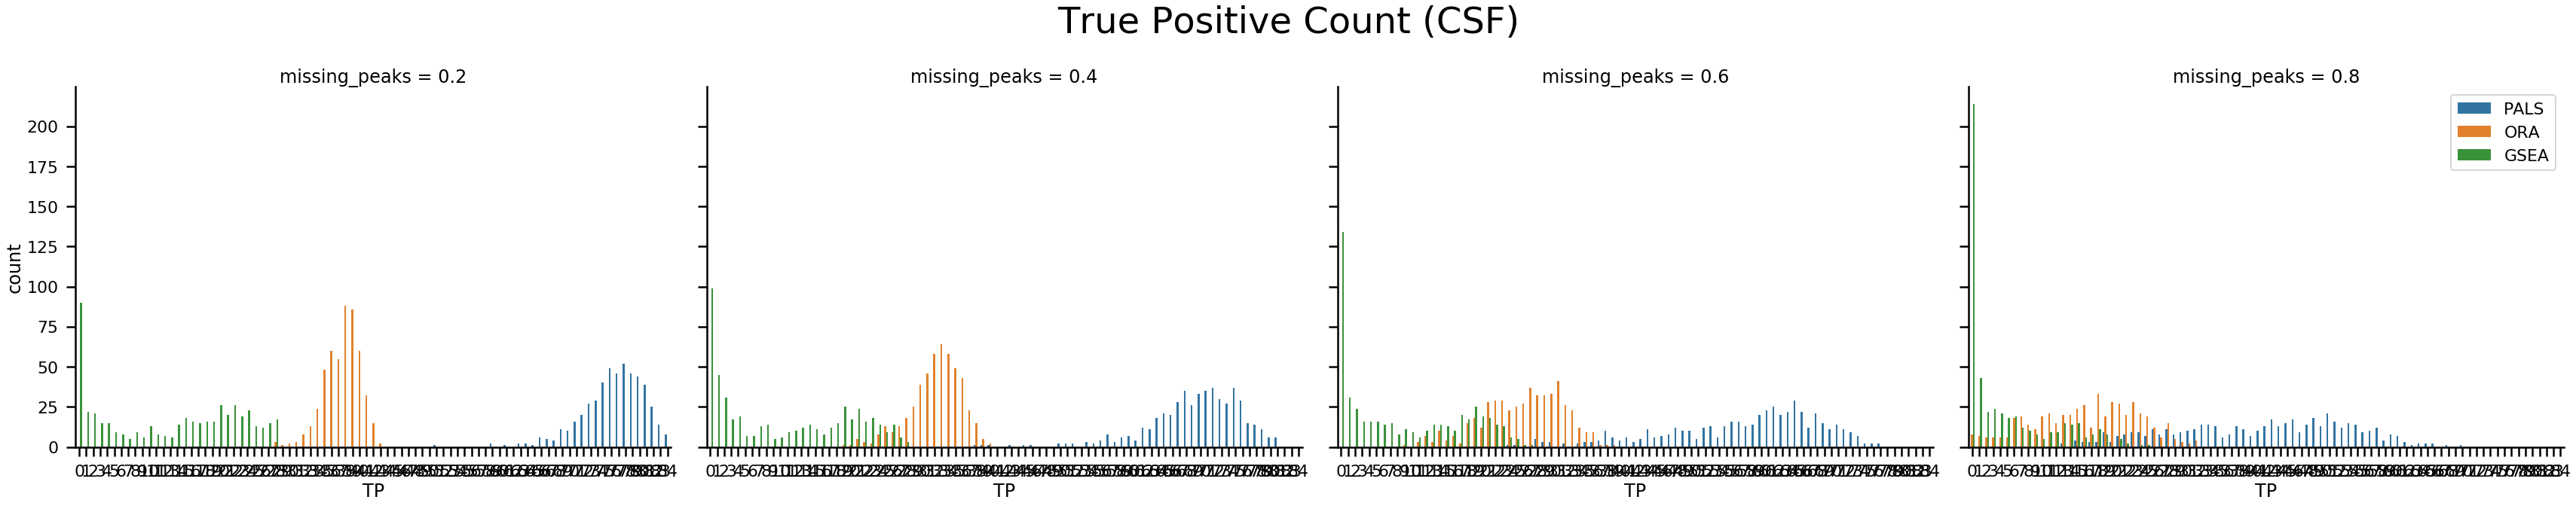

In [63]:
g = sns.catplot(x="TP", col='missing_peaks', hue="method", data=csf_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('True Positive Count (CSF)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf_TP.eps'), dpi=300)

#### False Positives

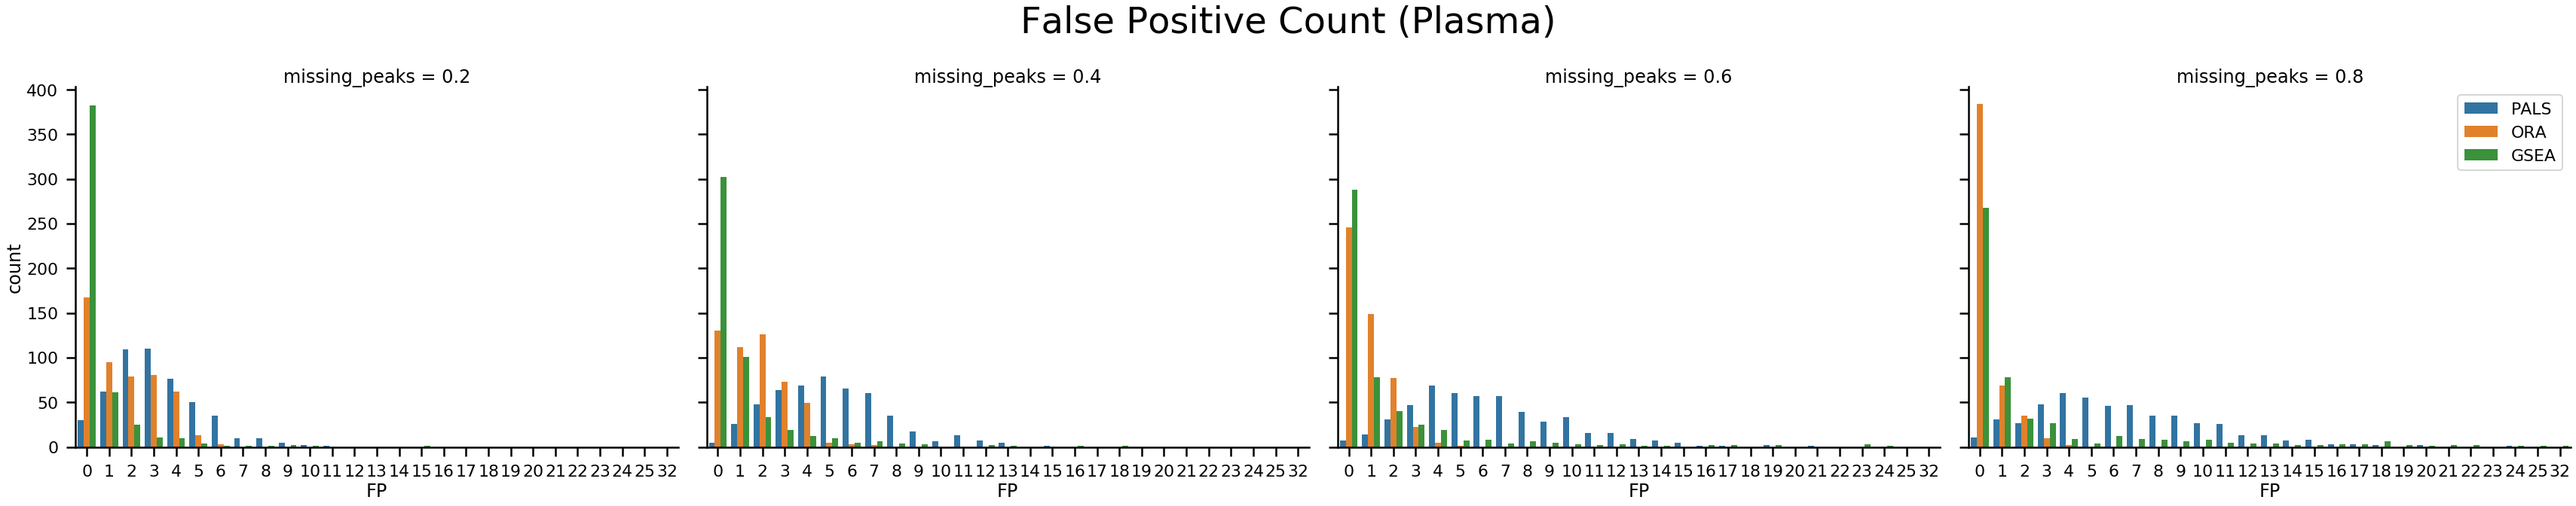

In [64]:
g = sns.catplot(x="FP", col='missing_peaks', hue="method", data=plasma_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Positive Count (Plasma)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma_FP.eps'), dpi=300)

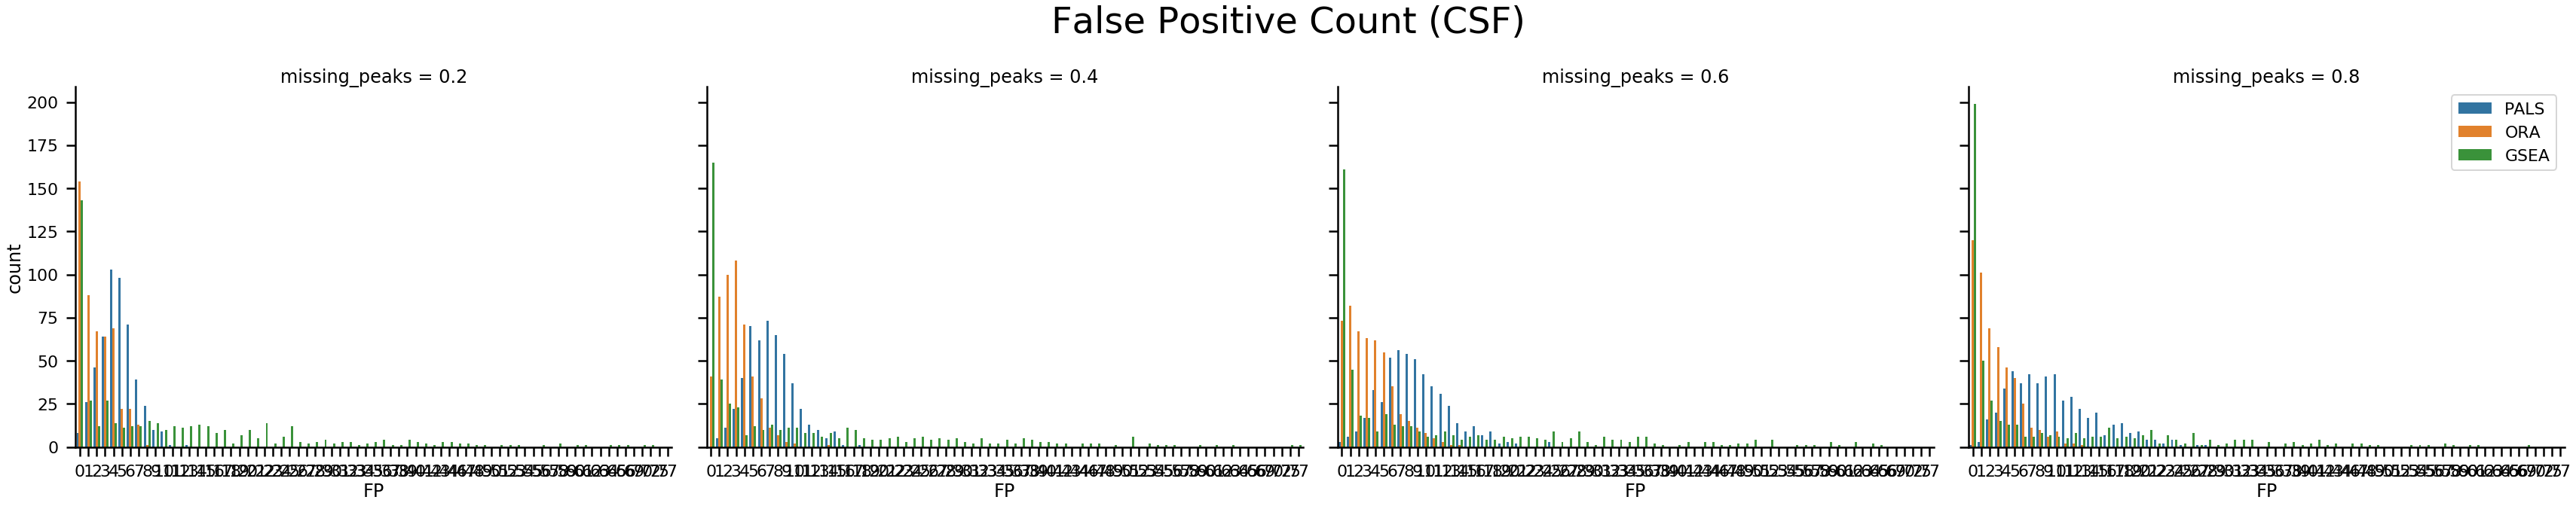

In [65]:
g = sns.catplot(x="FP", col='missing_peaks', hue="method", data=csf_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Positive Count (CSF)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf_FP.eps'), dpi=300)

#### False Negatives

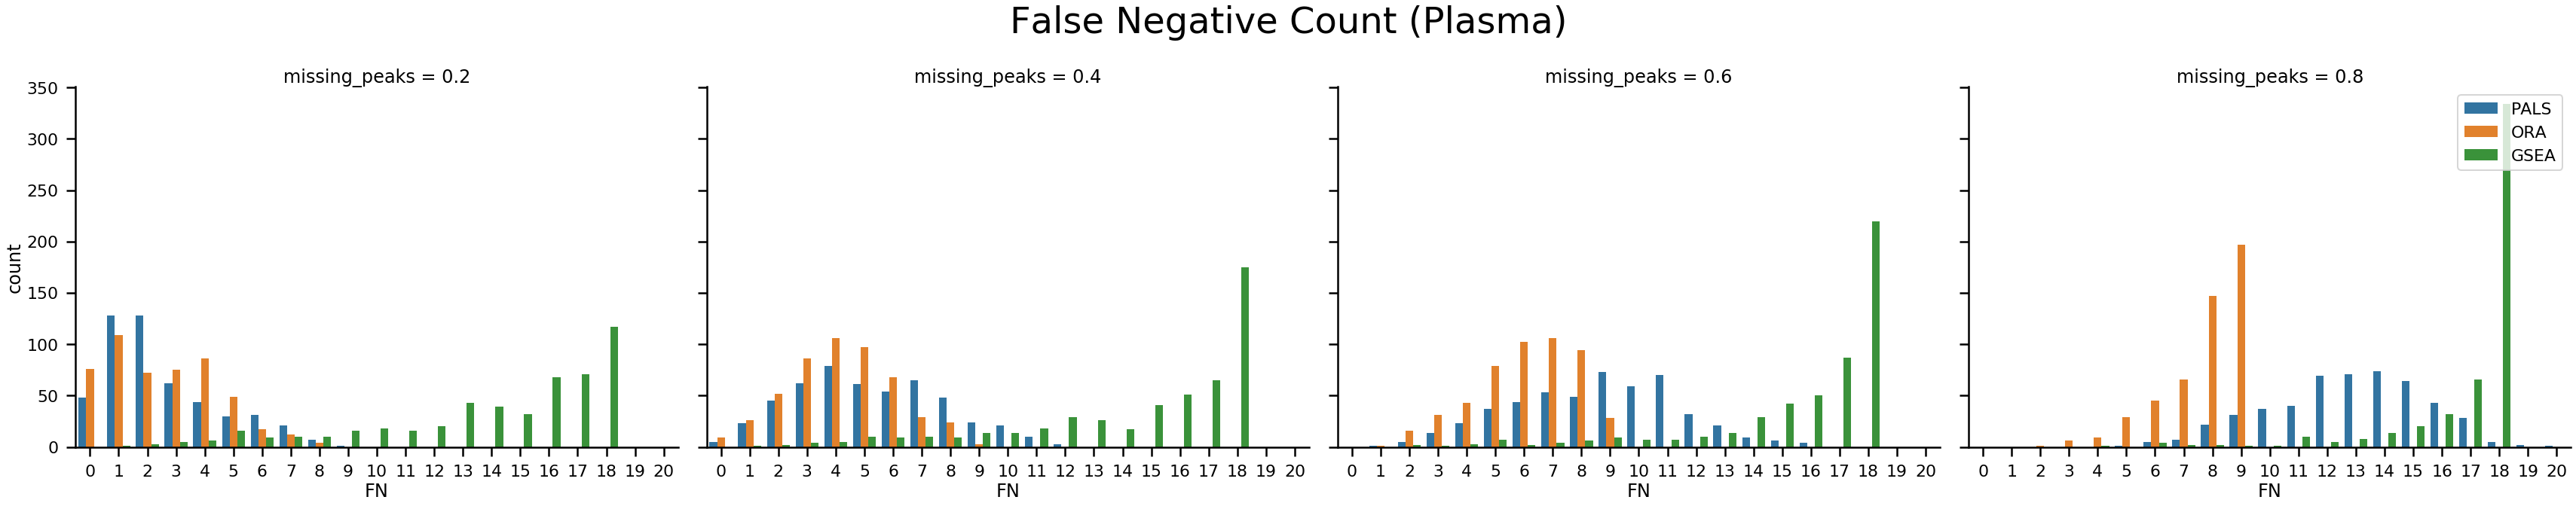

In [66]:
g = sns.catplot(x="FN", col='missing_peaks', hue="method", data=plasma_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Negative Count (Plasma)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma_FN.eps'), dpi=300)

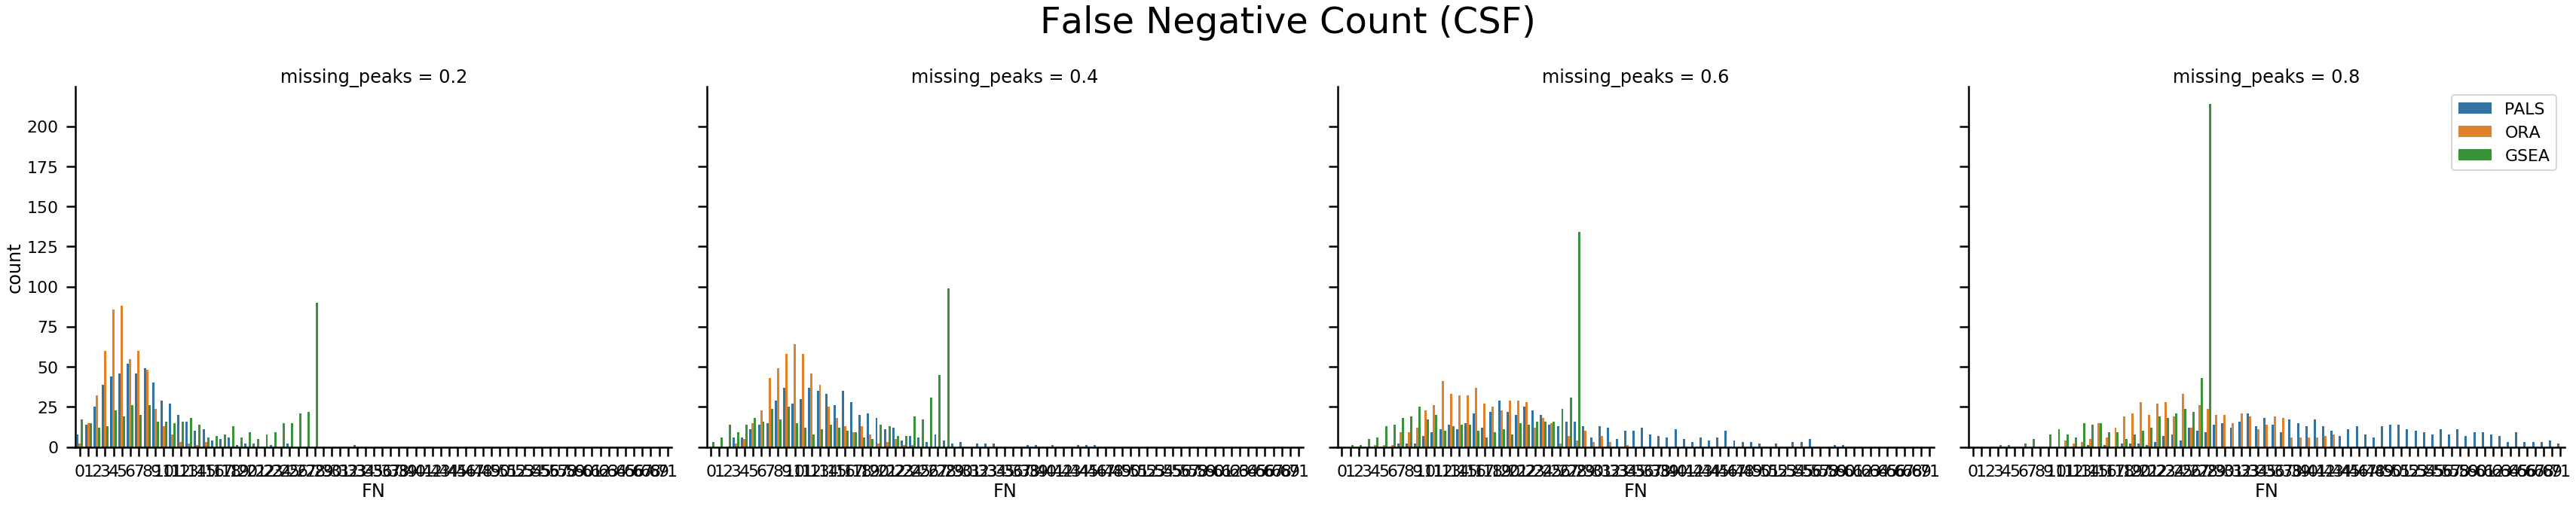

In [67]:
g = sns.catplot(x="FN", col='missing_peaks', hue="method", data=csf_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Negative Count (CSF)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf_FN.eps'), dpi=300)